In [9]:
from keras.models import Sequential 
from keras.layers import Dense,Flatten 
from keras.datasets import fashion_mnist,cifar10
from keras.utils import to_categorical
from keras.optimizers import Adam
from keras import regularizers
import matplotlib.pyplot as plt

In [2]:
(x_train,y_train),(x_test,y_test)=cifar10.load_data()

#normalize
x_train=x_train.astype('float32')/255.0
x_test=x_test.astype('float32')/255.0

#to_categorical(when we use softmax we need to use to_categorial)
y_train=to_categorical(y_train)
y_test=to_categorical(y_test)


In [3]:
#architecture
model_base=Sequential()
model_base.add(Flatten(input_shape=(32,32,3)))
model_base.add(Dense(1024,activation='relu'))
model_base.add(Dense(512,activation='relu'))
model_base.add(Dense(256,activation='relu'))
model_base.add(Dense(128,activation='relu'))
model_base.add(Dense(64,activation='relu'))
model_base.add(Dense(10,activation='softmax'))#we have 100 classes

d:\Engineering\PROJECTS\AI Bootcamp\.venv\lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [4]:
#compile
model_base.compile(optimizer=Adam(learning_rate=0.001),loss='categorical_crossentropy',metrics=['accuracy'])

#train
history=model_base.fit(x_train,y_train,epochs=10,batch_size=128,validation_split=0.2)

Epoch 1/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 13s 38ms/step - accuracy: 0.2745 - loss: 1.9650 - val_accuracy: 0.3385 - val_loss: 1.8473
Epoch 2/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 12s 38ms/step - accuracy: 0.3665 - loss: 1.7477 - val_accuracy: 0.3794 - val_loss: 1.7351
Epoch 3/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.4028 - loss: 1.6628 - val_accuracy: 0.3996 - val_loss: 1.6696
Epoch 4/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.4299 - loss: 1.5885 - val_accuracy: 0.4187 - val_loss: 1.6329
Epoch 5/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.4470 - loss: 1.5335 - val_accuracy: 0.4493 - val_loss: 1.5358
Epoch 6/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 13s 40ms/step - accuracy: 0.4667 - loss: 1.4890 - val_accuracy: 0.4578 - val_loss: 1.5307
Epoch 7/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 16s 50ms/step - accuracy: 0.4783 - loss: 1.4564 - val_accuracy: 0.4523 - val_loss: 1.5472
Epoch 8/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 15s 48ms/step - accuracy: 0.4906 - loss: 1.4196 - 

In [5]:
#evaluate
loss,test_accuracy=model_base.evaluate(x_test,y_test)
print(f"test accuracy:{test_accuracy}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.4927 - loss: 1.4339
test accuracy:0.4927000105381012


In [6]:
#*#
model_le4=Sequential()
model_le4.add(Flatten(input_shape=(32,32,3)))
model_le4.add(Dense(1024,activation='relu',kernel_regularizer=regularizers.l2(1e-4)))
model_le4.add(Dense(512,activation='relu',kernel_regularizer=regularizers.l2(1e-4)))
model_le4.add(Dense(256,activation='relu',kernel_regularizer=regularizers.l2(1e-4)))
model_le4.add(Dense(128,activation='relu',kernel_regularizer=regularizers.l2(1e-4)))
model_le4.add(Dense(64,activation='relu',kernel_regularizer=regularizers.l2(1e-4)))
model_le4.add(Dense(10,activation='softmax',kernel_regularizer=regularizers.l2(1e-4)))#we have 100 classes

model_le4.compile(optimizer=Adam(learning_rate=0.001),loss='categorical_crossentropy',metrics=['accuracy'])
#train
history_le4=model_le4.fit(x_train,y_train,epochs=10,batch_size=128,validation_split=0.2)

#evaluate
loss,test_accuracy=model_le4.evaluate(x_test,y_test)
print(f"test accuracy:{test_accuracy}")

Epoch 1/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 16s 44ms/step - accuracy: 0.2769 - loss: 2.1433 - val_accuracy: 0.3441 - val_loss: 1.9285
Epoch 2/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 14s 43ms/step - accuracy: 0.3697 - loss: 1.8512 - val_accuracy: 0.3661 - val_loss: 1.8662
Epoch 3/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 15s 48ms/step - accuracy: 0.4010 - loss: 1.7545 - val_accuracy: 0.4029 - val_loss: 1.8123
Epoch 4/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 15s 49ms/step - accuracy: 0.4233 - loss: 1.6863 - val_accuracy: 0.4018 - val_loss: 1.7380
Epoch 5/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 15s 49ms/step - accuracy: 0.4386 - loss: 1.6312 - val_accuracy: 0.4457 - val_loss: 1.6254
Epoch 6/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 15s 48ms/step - accuracy: 0.4538 - loss: 1.5974 - val_accuracy: 0.4496 - val_loss: 1.6235
Epoch 7/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 15s 49ms/step - accuracy: 0.4677 - loss: 1.5544 - val_accuracy: 0.4575 - val_loss: 1.5981
Epoch 8/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 16s 50ms/step - accuracy: 0.4795 - loss: 1.5204 - 

In [7]:
#*#
model_le2=Sequential()
model_le2.add(Flatten(input_shape=(32,32,3)))
model_le2.add(Dense(1024,activation='relu',kernel_regularizer=regularizers.l2(1e-2)))
model_le2.add(Dense(512,activation='relu',kernel_regularizer=regularizers.l2(1e-2)))
model_le2.add(Dense(256,activation='relu',kernel_regularizer=regularizers.l2(1e-2)))
model_le2.add(Dense(128,activation='relu',kernel_regularizer=regularizers.l2(1e-2)))
model_le2.add(Dense(64,activation='relu',kernel_regularizer=regularizers.l2(1e-2)))
model_le2.add(Dense(10,activation='softmax',kernel_regularizer=regularizers.l2(1e-2)))#we have 100 classes


model_le2.compile(optimizer=Adam(learning_rate=0.001),loss='categorical_crossentropy',metrics=['accuracy'])
#train
history_le2=model_le2.fit(x_train,y_train,epochs=10,batch_size=128,validation_split=0.2)

#evaluate
loss,test_accuracy=model_le2.evaluate(x_test,y_test)

Epoch 1/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 16s 44ms/step - accuracy: 0.2461 - loss: 5.0279 - val_accuracy: 0.2523 - val_loss: 2.6453
Epoch 2/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 13s 41ms/step - accuracy: 0.2757 - loss: 2.3824 - val_accuracy: 0.2658 - val_loss: 2.3215
Epoch 3/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 16s 50ms/step - accuracy: 0.2896 - loss: 2.2094 - val_accuracy: 0.3093 - val_loss: 2.1540
Epoch 4/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 15s 48ms/step - accuracy: 0.2948 - loss: 2.1502 - val_accuracy: 0.2919 - val_loss: 2.1721
Epoch 5/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 14s 45ms/step - accuracy: 0.3043 - loss: 2.1200 - val_accuracy: 0.3050 - val_loss: 2.1340
Epoch 6/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 14s 45ms/step - accuracy: 0.3135 - loss: 2.0995 - val_accuracy: 0.3102 - val_loss: 2.1053
Epoch 7/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 14s 45ms/step - accuracy: 0.3158 - loss: 2.0892 - val_accuracy: 0.3139 - val_loss: 2.1041
Epoch 8/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 14s 45ms/step - accuracy: 0.3170 - loss: 2.0887 - 

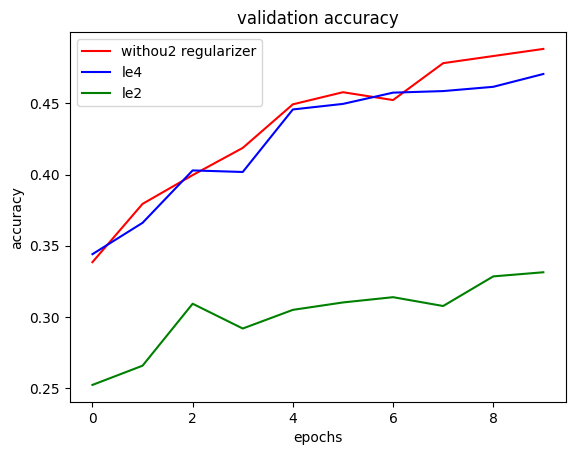

In [12]:
#visualization
plt.plot(history.history['val_accuracy'],label='withou2 regularizer',color='red')
plt.plot(history_le4.history['val_accuracy'],label='le4',color='blue')
plt.plot(history_le2.history['val_accuracy'],label='le2',color='green')
plt.title("validation accuracy")
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.legend()
plt.show()